# Undirected scale-free networks

## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

from netin.models import HomophilyModel, PAModel, PAHModel, PATCHModel, CompoundLFM
from netin import viz
from netin.stats import get_node_metadata_as_dataframe

## Network parameters

In [2]:
n = 1000
k = 2
f_m = 0.1
h_MM = 0.9
h_mm = 0.9
tc = 0.8
seed = 1234

## Generation

In [4]:
# PA: Preferential attachment
m_pa = PAModel(N=n, m=k, f_m=f_m, seed=seed)
m_pa.simulate()

In [5]:
# H: Homophily
m_h = HomophilyModel(N=n, m=k, f_m=f_m, h_m=h_mm, h_M=h_MM, seed=seed)
m_h.simulate()

In [6]:
# PAH: Preferential attachment and homophily
m_pah = PAHModel(N=n, m=k, f_m=f_m, h_m=h_mm, h_M=h_MM, seed=seed)
m_pah.simulate()

In [7]:
# PATCH: Preferential attachment, homophily, and triadic closure
lfm_l = CompoundLFM.PAH
lfm_g = CompoundLFM.PAH
p_tc = .0

m_patch = PATCHModel(N=n, m=k, f_m=f_m,
                     p_tc=p_tc,
                     lfm_local=lfm_l, lfm_global=lfm_g,
                     lfm_params={'h_m': h_mm, 'h_M': h_MM},
                     seed=seed)

m_patch.simulate()

## Plots

In [8]:
viz.reset_style()
viz.set_paper_style()

### Graph

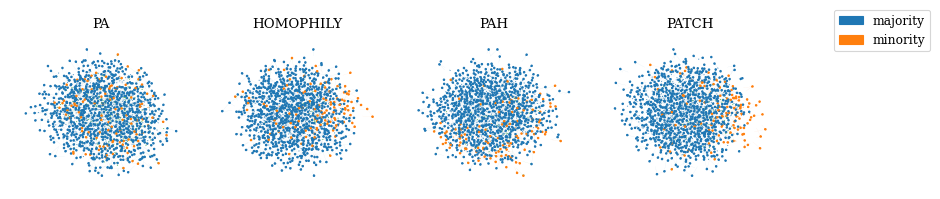

In [13]:
models = [m_pa, m_h, m_pah, m_patch]
viz.plot_graph(
    models,
    cell_size=2, share_pos=False,
    ignore_singletons=False)

### Node attributes

In [14]:
distributions = []
for m in models:
    md = get_node_metadata_as_dataframe(graph=m.graph, n_jobs=10)
    md.name = m.SHORT
    distributions.append(md)
    del(md)

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [16]:
# see example of genereate metadata
distributions[0].head()

,node,class_label,real_label,degree,in_degree,out_degree,clustering,betweenness,closeness,eigenvector,pagerank,degree_rank,in_degree_rank,out_degree_rank,clustering_rank,betweenness_rank,closeness_rank,eigenvector_rank,pagerank_rank
0,0,0,M,41,NaN,NaN,0.003659,0.082628,0.329703,0.170853,0.008859,0.161290,NaN,NaN,0.944444,0.006116,0.009472,0.007021,0.006042
1,1,0,M,51,NaN,NaN,0.008627,0.146169,0.363273,0.343799,0.010891,0.032258,NaN,NaN,0.694444,0.002039,0.001353,0.001003,0.002014
2,2,0,M,24,NaN,NaN,0.010870,0.046946,0.327863,0.152640,0.005159,0.354839,NaN,NaN,0.638889,0.010194,0.010825,0.008024,0.013092
3,3,0,M,42,NaN,NaN,0.013937,0.118515,0.358579,0.297546,0.008881,0.129032,NaN,NaN,0.500000,0.004077,0.002706,0.002006,0.005035
4,4,0,M,2,NaN,NaN,0.000000,0.000824,0.282283,0.048767,0.000513,1.000000,NaN,NaN,1.000000,0.457696,0.073072,0.056169,0.998993


#### Degree

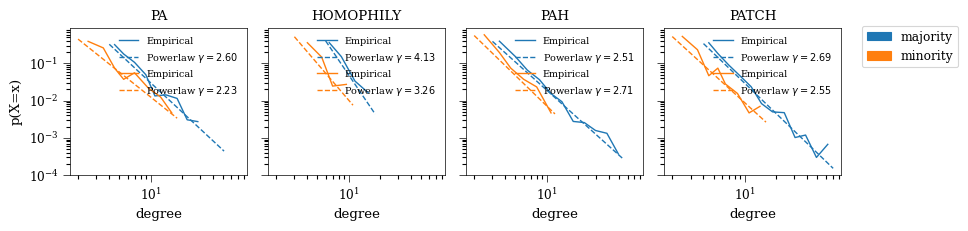

In [17]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='real_label',
                      kind='pdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

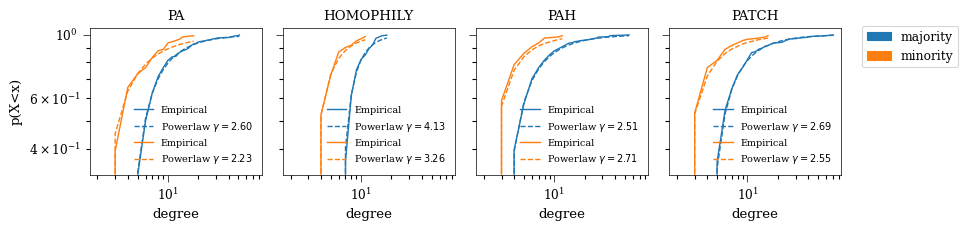

In [18]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='real_label',
                      kind='cdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

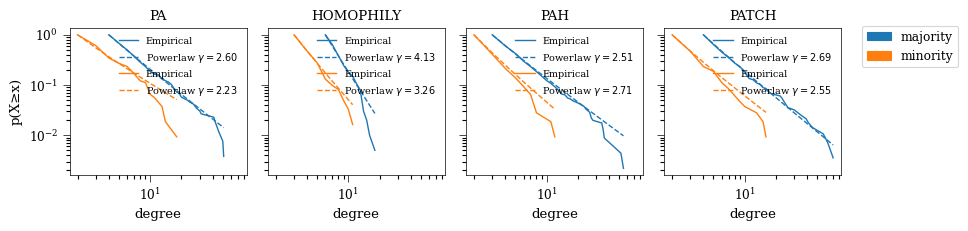

In [19]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='real_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### Clustering

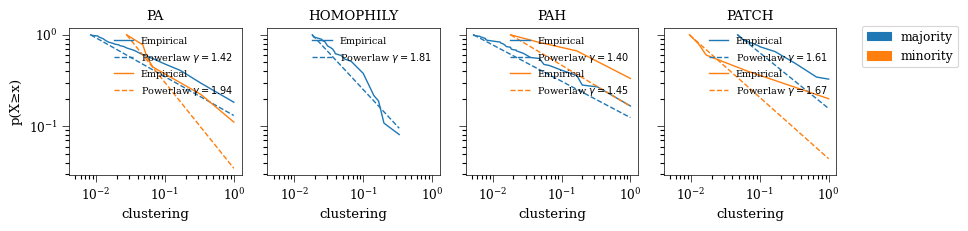

In [20]:
viz.plot_powerlaw_fit(distributions, col_name='clustering', hue='real_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### PageRank

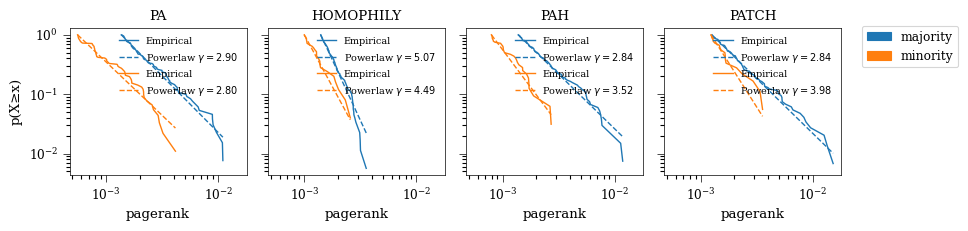

In [21]:
viz.plot_powerlaw_fit(distributions, col_name='pagerank', hue='real_label',
                      kind='ccdf', verbose=False, bbox=(1, 0.9), fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)